# <font color = 'blue'> I.BUSINESS UNDERSTANDING
<font color = 'blue'>Real estate has traditionally been a staple asset for investors that offer potential benefits such as excellent cash flow and diversification of asset portfolios.  When well-chosen, real estates typically appreciate in value over time, thus providing protection against inflation.  For these reasons, data on real estate pricings based listings of properties for sale are collected because they useful to potential investors.  These listings can be used as a starting basis for property valuation given specific group(s) of features.  

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from pandas import set_option
set_option('display.max_columns',400)
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import scipy

In [2]:
# Import libraries for clustering

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.neighbors import KNeighborsRegressor

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as px

# <font color = 'blue'> II.DATA UNDERSTANDING
<font color = 'blue'>A.Meaning and Type of Data for Attributes: Property_type and Country

<font color = 'blue'>B.Data Quality: 

<font color= 'blue'>Outliers:  Outliers were included in the analysis because the dataset has over 400,000 entries, thus making any one outlier's effect on the data minimal.

<font color = 'blue'>Missing Values:  the final dataset used in cluster analysis was an imputed dataset using XXXX values for each attribute with missing data.


In [3]:
# Read in the imputed dataset

# Tom
df = pd.read_csv('C:\\Users\\Tpeng\\OneDrive\\Documents\\SMU\\Term 3\\Machine Learning\\Lab1\\Imputed_Dataset.csv', sep = ',', header = 0)

#Quynh
#df = pd.read_csv('Imputed_Dataset.csv', sep = ',', header = 0)

# Anish
#df = pd.read_csv('filepath, sep = ',', header = 0)

# Michael
#df = pd.read_csv('filepath', sep = ',', header = 0)

# Drop index column
df = df.drop(columns = 'Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463724 entries, 0 to 463723
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              409210 non-null  float64
 1   lon              409210 non-null  float64
 2   rooms            463724 non-null  float64
 3   bedrooms         463724 non-null  float64
 4   bathrooms        463724 non-null  float64
 5   surface_total    463724 non-null  float64
 6   surface_covered  463724 non-null  float64
 7   price            463723 non-null  float64
 8   log_price        463724 non-null  float64
 9   id               463723 non-null  object 
 10  start_date       463723 non-null  object 
 11  end_date         463723 non-null  object 
 12  created_on       463723 non-null  object 
 13  property_type    463723 non-null  object 
 14  l1               463723 non-null  object 
 15  l2               463723 non-null  object 
 16  l3               441216 non-null  obje

In [4]:
# Reformat attributes, excluding categoricals, which aren't supported for the the dummy variable generation method used.
#ordinal_vars = ['rooms', 'bedrooms', 'bathrooms' ]
continuous_vars = ['rooms', 'bedrooms', 'bathrooms', 'lat', 'lon', 'surface_total', 'surface_covered', 'price', 'log_price']
string_vars = ['id', 'title', 'description','property_type', 'l1','description']
time_vars = ['start_date', 'end_date', 'created_on']

# Change data types
#df[ordinal_vars] = df[ordinal_vars].astype('uint8')
df[continuous_vars] = df[continuous_vars].astype(np.float64)
df[string_vars] = df[string_vars].astype(str)

# Remove observations missing price before encoding 
df2 = df.dropna(axis = 0, subset = ['price'])

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463723 entries, 0 to 463722
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              409210 non-null  float64
 1   lon              409210 non-null  float64
 2   rooms            463723 non-null  float64
 3   bedrooms         463723 non-null  float64
 4   bathrooms        463723 non-null  float64
 5   surface_total    463723 non-null  float64
 6   surface_covered  463723 non-null  float64
 7   price            463723 non-null  float64
 8   log_price        463723 non-null  float64
 9   id               463723 non-null  object 
 10  start_date       463723 non-null  object 
 11  end_date         463723 non-null  object 
 12  created_on       463723 non-null  object 
 13  property_type    463723 non-null  object 
 14  l1               463723 non-null  object 
 15  l2               463723 non-null  object 
 16  l3               441216 non-null  obje

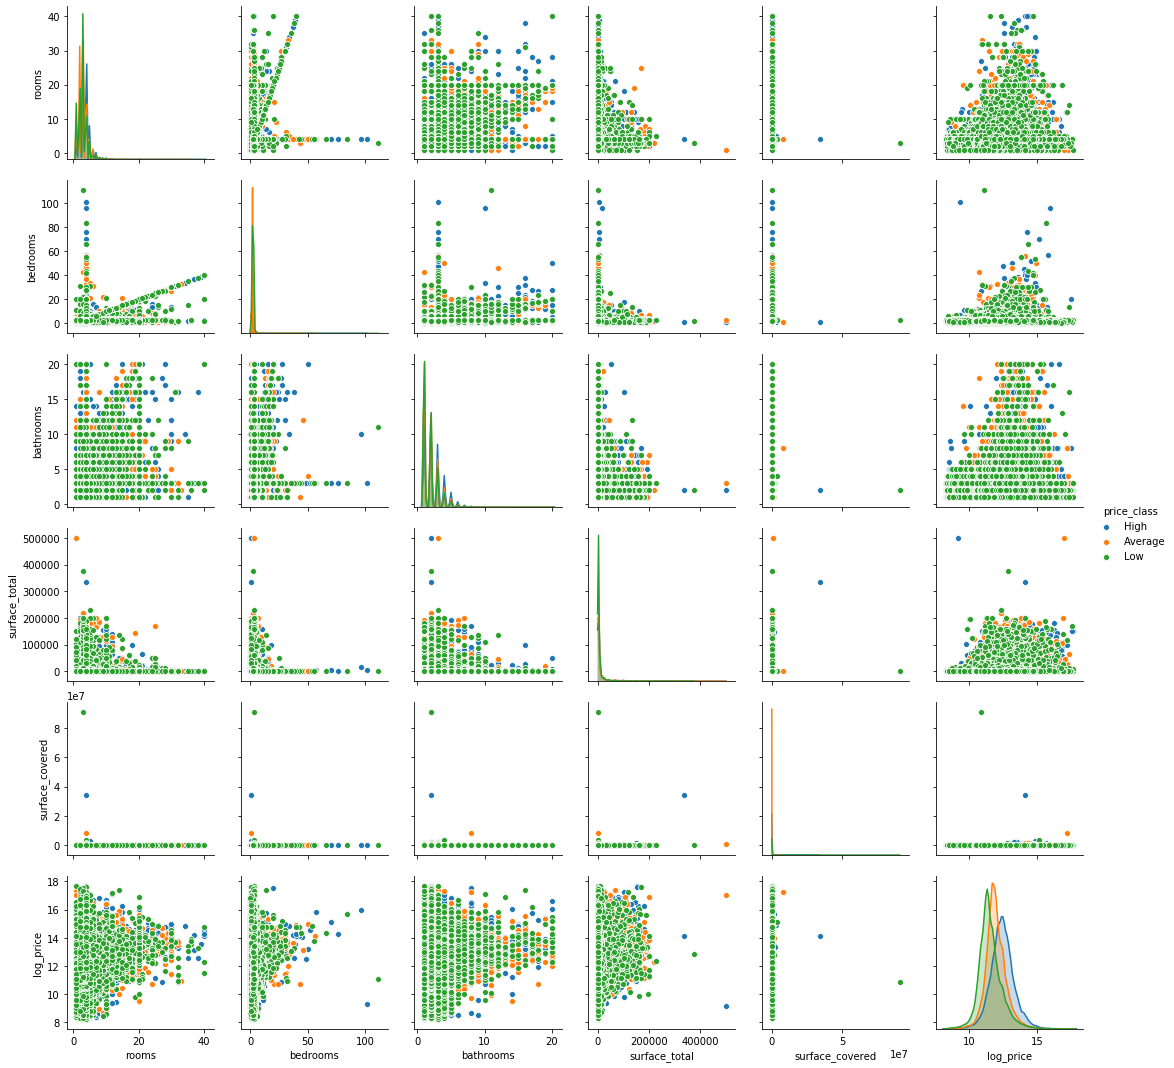

In [174]:
# Check variables correlations with df
features = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'log_price', 'price_class', 'l1', 'property_type']
sns.pairplot(df[features], hue = 'price_class')

In [6]:
# Remove ALL OUTLIERS for use in PCA EXCLUDING PRICE VAR OF SOME SORT
# Define Function for removing outliers of numeric columns 
def remove_outlier(df):
    i = []
    low = .05
    high = .95
    cols = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'] #, 'log_price'
    quant_df = df[cols].quantile([low, high])
    
    for var in cols:
        df.loc[(df[var] < quant_df.loc[high, var]), 'keep'] = 1
        df.loc[(df[var] >= quant_df.loc[high, var]), 'keep'] = 0
#         df.loc[(df[var] < quant_df.loc[low, var]), 'keep'] = 0
#         df.loc[(df[var] >= quant_df.loc[low, var]), 'keep'] = 1
        
        df = df[df.keep == 1]
        df = df.drop(columns = 'keep', inplace = False)
    return df

In [7]:
df2 = remove_outlier(df)
df2.reset_index(inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374434 entries, 0 to 374433
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            374434 non-null  int64  
 1   lat              332875 non-null  float64
 2   lon              332875 non-null  float64
 3   rooms            374434 non-null  float64
 4   bedrooms         374434 non-null  float64
 5   bathrooms        374434 non-null  float64
 6   surface_total    374434 non-null  float64
 7   surface_covered  374434 non-null  float64
 8   price            374433 non-null  float64
 9   log_price        374434 non-null  float64
 10  id               374434 non-null  object 
 11  start_date       374433 non-null  object 
 12  end_date         374433 non-null  object 
 13  created_on       374433 non-null  object 
 14  property_type    374434 non-null  object 
 15  l1               374434 non-null  object 
 16  l2               374433 non-null  obje

In [9]:
df_priceclass = df2.copy()
df_priceclass = df_priceclass.drop(columns = ['index', 'lat', 'lon', 'price', 'id', 'start_date', 'end_date', 'created_on',
                                             'l2', 'l3', 'title', 'description'])
df_priceclass.reset_index(inplace = True)

In [10]:
# Create the categorized price attribute manually
price_class = []
low = .333
average = .666

quants = df_priceclass.log_price.quantile([low, average])
    
for obs in range(len(df_priceclass)):
    if df_priceclass.log_price[obs] <= quants.loc[low]:
        price_class.append('Low')
    elif df_priceclass.log_price[obs] >= quants.loc[average]:
        price_class.append('High')
    else:
        price_class.append('Average')

# Add the new column to the imputed dataframe
df_priceclass['price_class_overall'] = pd.DataFrame(price_class)
df_priceclass.drop(index = 374433, inplace = True)

In [11]:
df_priceclass

,index,rooms,bedrooms,bathrooms,surface_total,surface_covered,log_price,property_type,l1,price_class,price_class_overall
0,0,4.0,3.0,2.0,198.0,150.0,12.860999,Casa,Argentina,High,High
1,1,4.0,3.0,2.0,198.0,150.0,12.860999,Casa,Argentina,High,High
2,2,3.0,3.0,1.0,49.0,40.0,11.350407,Casa,Argentina,Low,Low
3,3,3.0,3.0,1.0,49.0,40.0,11.350407,Casa,Argentina,Low,Low
4,4,4.0,3.0,3.0,400.0,400.0,13.253392,Casa,Argentina,High,High
...,...,...,...,...,...,...,...,...,...,...,...
374428,374428,5.0,2.0,1.0,214.0,107.0,11.502875,Departamento,Uruguay,Average,Average
374429,374429,2.0,2.0,1.0,63.0,62.0,11.767568,Departamento,Uruguay,High,Average
374430,374430,4.0,2.0,2.0,255.0,128.0,12.254863,Otro,Uruguay,Low,High
374431,374431,4.0,3.0,2.0,114.0,114.0,11.918391,Departamento,Uruguay,Average,Average


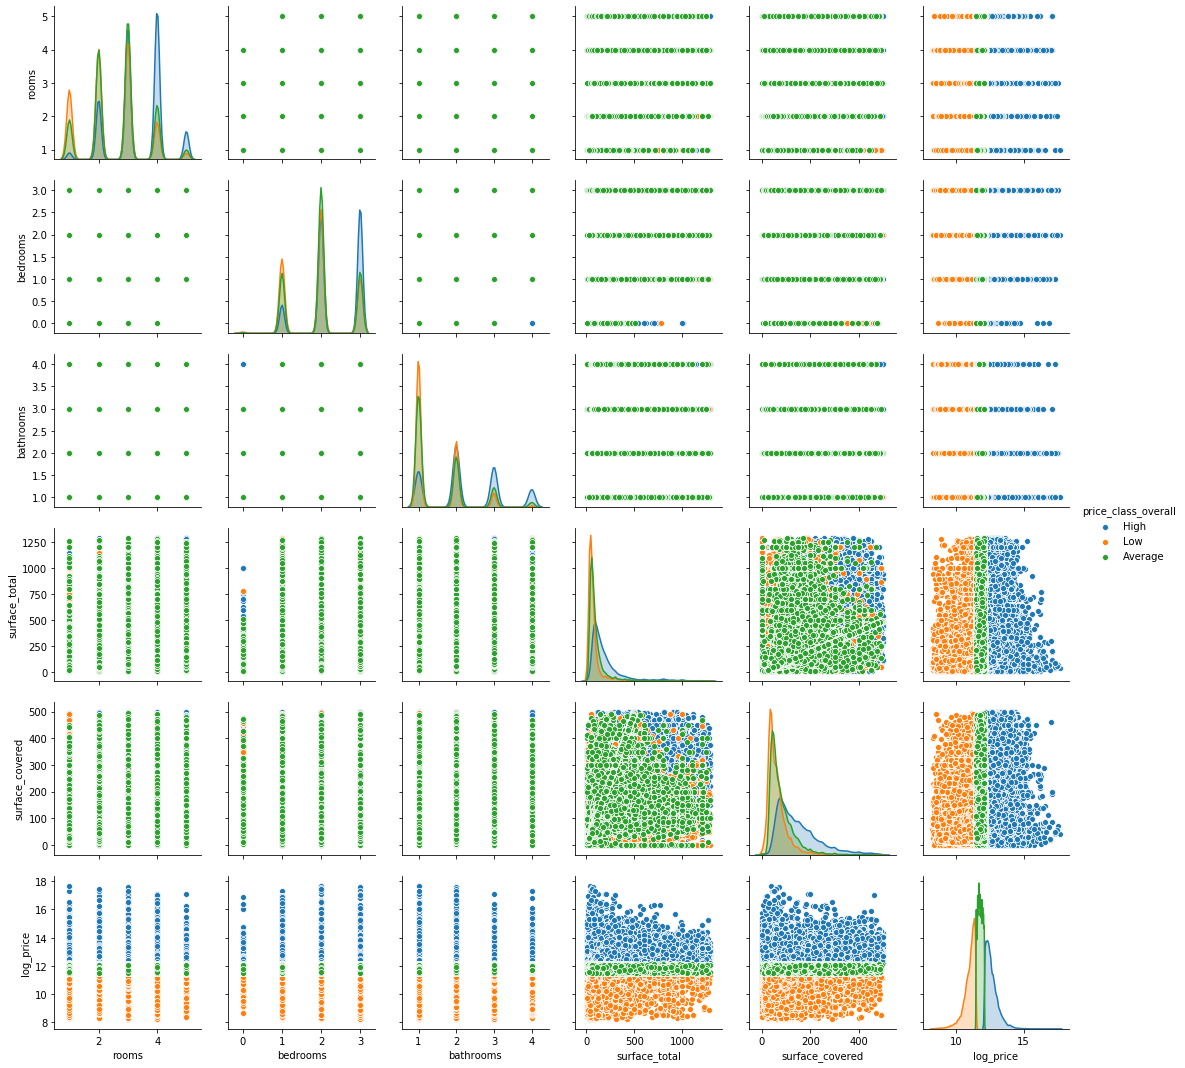

In [13]:
# Check variables correlations with df2 outliers removed
features = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'log_price', 'price_class', 'l1', 
            'property_type', 'price_class_overall']
sns.pairplot(df_priceclass[features], hue = 'price_class_overall')

The pair plot above shows that surface_covered, surface_total, and bathrooms may require a square root transformation to make their distributions more normal.

In [11]:
df_priceclass

,index,rooms,bedrooms,bathrooms,surface_total,surface_covered,log_price,property_type,l1,price_class,price_class_overall
0,0,4.0,3.0,2.0,198.0,150.0,12.860999,Casa,Argentina,High,High
1,1,4.0,3.0,2.0,198.0,150.0,12.860999,Casa,Argentina,High,High
2,2,3.0,3.0,1.0,49.0,40.0,11.350407,Casa,Argentina,Low,Low
3,3,3.0,3.0,1.0,49.0,40.0,11.350407,Casa,Argentina,Low,Low
4,4,4.0,3.0,3.0,400.0,400.0,13.253392,Casa,Argentina,High,High
...,...,...,...,...,...,...,...,...,...,...,...
374428,374428,5.0,2.0,1.0,214.0,107.0,11.502875,Departamento,Uruguay,Average,Average
374429,374429,2.0,2.0,1.0,63.0,62.0,11.767568,Departamento,Uruguay,High,Average
374430,374430,4.0,2.0,2.0,255.0,128.0,12.254863,Otro,Uruguay,Low,High
374431,374431,4.0,3.0,2.0,114.0,114.0,11.918391,Departamento,Uruguay,Average,Average


In [ ]:
# Check variables correlations with df2 outliers removed
features = ['sqrt_bathrooms', 'sqrt_surface_total', 'sqrt_surface_covered', 'price_class_overall', 'sqrt_bedrooms', 'sqrt_rooms']
sns.pairplot(df_priceclass[features], hue = 'price_class_overall')

In [12]:
# Remove outliers and recast data for plotting
df_priceclass.drop(columns = 'index', inplace = True)
df_priceclass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374433 entries, 0 to 374432
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   rooms                374433 non-null  float64
 1   bedrooms             374433 non-null  float64
 2   bathrooms            374433 non-null  float64
 3   surface_total        374433 non-null  float64
 4   surface_covered      374433 non-null  float64
 5   log_price            374433 non-null  float64
 6   property_type        374433 non-null  object 
 7   l1                   374433 non-null  object 
 8   price_class          374433 non-null  object 
 9   price_class_overall  374433 non-null  object 
dtypes: float64(6), object(4)
memory usage: 31.4+ MB


In [ ]:
# Check variables correlations with df_priceclass
sns.pairplot(df_priceclass, hue = 'price_class_overall')

# PCA 
Use PCA to cluster on components. We want to cluster over numeric variables and country, price classification, and property type to determine if clustering along these components can yield additional information about the real estate market in South America.

In [13]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
cv_obj = KFold(n_splits = 10, shuffle = True, random_state = 6)
pca = PCA(n_components = 20, random_state = 6, svd_solver = 'full')

The cell above was used in analsis. The one below is being trialed.

In [14]:
# Dummify country vars 
pca_dummy = pd.get_dummies(df_priceclass, columns = ['l1', 'property_type', 'price_class_overall'], 
                          prefix = {'l1':'Country', 'property_type':'Property_Type', 'price_class_overall':'Price_Class_Overall'}, 
                          sparse = True, drop_first = False)

In [ ]:
pca_dummy

C:\Users\Tpeng\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:509: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


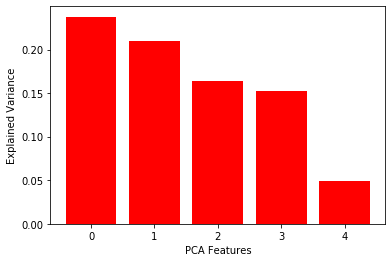

In [15]:
pca2 = PCA(n_components = 5, random_state = 6, svd_solver = 'full')
scaler = MinMaxScaler()
normalize = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']
reduced_df = pca_dummy.drop(columns = ['log_price','price_class'])

X_norm = pd.DataFrame(scaler.fit_transform(reduced_df[normalize]))
X_norm = pd.concat([X_norm, reduced_df.drop(columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total',
                                                      'surface_covered'], axis = 1)], axis = 1)

X_pca = pca2.fit_transform(X_norm)

features = range(pca2.n_components_)
plt.bar(features, pca2.explained_variance_ratio_, color = 'red')
plt.xlabel('PCA Features')
plt.ylabel('Explained Variance')
plt.xticks(features)

PCA_comps = pd.DataFrame(X_pca)

In [ ]:
# Determine which PCAs to keep
pca2.explained_variance_ratio_

In [ ]:
# Create dataset in PC Space
PCA_comps.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
PCA_comps

In [ ]:
pca_dummy

In [ ]:
# Create a dataframe to better view components relationship to variables
Principal_Components = pd.DataFrame(columns = list(reduced_df.columns), data = pca2.components_)
Principal_Components

## Principal Component Analysis
PC1: The first principal component has minor positive correlations with the number of rooms, bedrooms, bathrooms, surface total and surface covered attributes (0.236, 0.206, 0.263, 0.102, 0.153), and negligible correlations with country variables. The most significant positive weights are for Housing property types (0.437) and an overall price classification of high (.4734). These variable tend to increase together, meaning that houses are likely to increase in price classification as the number of rooms, bedrooms, bathrooms, and land and housing areas increase.  The most significant negative weights are for property type apartment (-0.505) and price class average and low (-0.2176 and -0.256)

In [20]:
# Dummify country vars 
pca_dummy = pd.get_dummies(df_priceclass, columns = ['l1', 'property_type', 'price_class_overall'], 
                          prefix = {'l1':'Country', 'property_type':'Property_Type', 'price_class_overall':'Price_Class_Overall'}, 
                          sparse = True, drop_first = False)

In [ ]:
pca_dummy

C:\Users\Tpeng\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:509: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


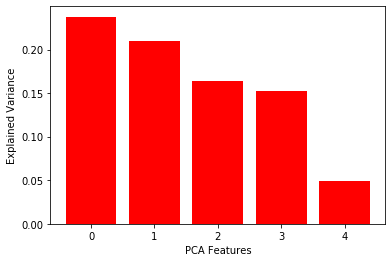

In [19]:
pca2 = PCA(n_components = 5, random_state = 6, svd_solver = 'full')
scaler = MinMaxScaler()
normalize = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']
reduced_df = pca_dummy.drop(columns = ['log_price','price_class'])

X_norm = pd.DataFrame(scaler.fit_transform(reduced_df[normalize]))
X_norm = pd.concat([X_norm, reduced_df.drop(columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total',
                                                      'surface_covered'], axis = 1)], axis = 1)

X_pca = pca2.fit_transform(X_norm)

features = range(pca2.n_components_)
plt.bar(features, pca2.explained_variance_ratio_, color = 'red')
plt.xlabel('PCA Features')
plt.ylabel('Explained Variance')
plt.xticks(features)

PCA_comps = pd.DataFrame(X_pca)

In [ ]:
# Determine which PCAs to keep
exp_var = pca2.explained_variance_ratio_.reshape(5,1)

In [21]:
# Create a dataframe to better view components relationship to variables
Principal_Components = pd.DataFrame(columns = list(reduced_df.columns), data = pca2.components_)
Principal_Components.insert(loc = 0, column = 'PC', value = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
Principal_Components

,PC,rooms,bedrooms,bathrooms,surface_total,surface_covered,Country_Argentina,Country_Colombia,Country_Ecuador,Country_Perú,Country_Uruguay,Property_Type_Casa,Property_Type_Casa de campo,Property_Type_Departamento,Property_Type_Depósito,Property_Type_Finca,Property_Type_Garaje,Property_Type_Local comercial,Property_Type_Lote,Property_Type_Oficina,Property_Type_Otro,Property_Type_PH,Property_Type_Parqueadero,Price_Class_Overall_Average,Price_Class_Overall_High,Price_Class_Overall_Low
0,PC1,0.236155,0.206548,0.263928,0.102669,0.153587,-0.091269,0.070120,0.000252,0.013255,0.007642,0.437418,0.000544,-0.505036,0.003869,0.001584,-0.003036,0.011317,0.011673,0.009996,0.017097,0.013996,0.000579,-0.217638,0.473494,-0.255855
1,PC2,-0.025726,0.059448,0.129036,-0.013070,0.012236,-0.612432,0.548638,0.000381,0.055049,0.008365,0.033185,-0.001182,-0.011974,-0.003751,0.004076,0.000209,-0.006672,0.016224,-0.004267,0.019158,-0.046726,0.001719,-0.241664,-0.201579,0.443243
2,PC3,0.034515,0.067878,0.075301,0.008124,0.023627,-0.260449,0.216265,0.000431,0.028934,0.014819,0.139727,0.000078,-0.124954,-0.001582,0.002050,-0.008897,-0.011570,0.001053,-0.003130,0.007010,-0.000570,0.000785,0.745078,-0.327178,-0.417900
3,PC4,0.027349,0.017491,0.191029,-0.009210,0.049070,-0.258742,0.185870,-0.000177,0.053404,0.019646,-0.383572,-0.001986,0.544936,-0.002793,0.000327,-0.015116,-0.029729,-0.009061,-0.024075,-0.003249,-0.075847,0.000164,-0.041632,0.468587,-0.426955
4,PC5,-0.195152,-0.289946,-0.095469,-0.035194,0.002516,-0.210163,-0.058299,0.000348,0.230074,0.038039,-0.512425,0.005086,-0.501423,0.018530,0.006592,0.027278,0.245076,0.109061,0.163494,0.079884,0.354998,0.003849,-0.011011,0.103204,-0.092193


## Principal Component Analysis
Note: The interpretation of principal components after PC1 must acknowledge that earlier principal components already account for much of our data's variance, and that they explain differences after accounting for correlations in previous components.
<br>
PC1: The first principal component has minor positive correlations with the number of rooms, bedrooms, bathrooms, surface total and surface covered attributes (0.236, 0.206, 0.263, 0.102, 0.153), and negligible correlations with country variables. The most significant positive weights are for Housing property types (0.437) and an overall price classification of high (.4734). These variable tend to increase together, meaning that houses are likely to increase in price classification as the number of rooms, bedrooms, bathrooms, and land and housing areas increase.  The most significant negative weights are for property type apartment (-0.505) and price class average and low (-0.2176 and -0.256). This means that as the number of various rooms and property sizes increase, the property is less likely to be an apartment or classified as a high price property. It suggests that apartments tend to be average priced and smaller.
<br>
PC2: The second component has minor positve weight (0.129) for the number of bathrooms and negligible weights for the other numeric variables.  It is strongly negatively correlated with the country Argentina (-0.6124) and strongly positively correlated with Colombia (0.5486).  There are no significant correlations with property types, but it is significantly correlated with price classifications of low, average, and high (0.443, -0.241, -0.2016 respectively). This suggests that properties listed in Argentina tend to have slightly fewer bathrooms than other nations, while Colombia has more. These properties also tend to be classified as a low-priced property overall.
<br>
PC3: The third component has some some minor correlations with the countries Argentina and Colombia (-0.26 and 0.216 respectively).  It has a minor negative correlation with Apartments (-0.1249). This component is most strongly associated with the property's price classification, with weights for low, average, and high of -0.4179, 0.745, and -0.327 respectively.  This suggests that Argentina is more likely to have a low or high price classification, once other PCs are accounted for, while Colombia tends to have more average-priced properties.
<br>
PC4: The fourth component has a minor positive correlation with the number of bathrooms (0.191), and some minor correlations with the countries Argentina and Colombia (-0.258 and 0.1858). It has a weight of -0.3835 for house property types and 0.5449 for apartment property types, and weights of 0.468587 and -0.426955 for high and low price classifications.  This can be interpreted as properties in Argentina tend to have fewer bathrooms than Colombia (confirmation of PC2 interpretation), and that these correlations are more negatively associated with houses and positively associated with apartments. These properties (houses in Argentina) tend to have a low price classifications, while Apartments in Colombia tend to have a high price classification.
<br>
PC5: It is not until PC5 that the majority of property types can be incorporated. This component includes minor correlations with rooms and bedrooms (-.195 and -0.2899), as well as with the country Argentina and Peru (-0.21 and 0.23). It also includes relatively large weights for houses, apartments, commercial shops, lots, offices, and horizontal property types (-0.5124, -0.50142, 0.245, 0.109, 0.1634, 0.354). There are insignificant weights given to price classifications in this component, which suggests that property type does not have a significant impact on property price once all other principal components have been taken into consideration.

In [119]:
# Visualize PCA Components while color coding for property type, price class, or country for easier interpretaion of Principal Components
PCA_viz = pd.concat([PCA_comps, df_priceclass.l1, df_priceclass.property_type, df_priceclass.price_class_overall], axis = 1)
PCA_viz.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'l1', 'property_type', 'price_class_overall']
PCA_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374433 entries, 0 to 374432
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PC1                  374433 non-null  float64
 1   PC2                  374433 non-null  float64
 2   PC3                  374433 non-null  float64
 3   PC4                  374433 non-null  float64
 4   PC5                  374433 non-null  float64
 5   l1                   374433 non-null  object 
 6   property_type        374433 non-null  object 
 7   price_class_overall  374433 non-null  object 
dtypes: float64(5), object(3)
memory usage: 22.9+ MB


# This is helpful to interpret principal componentss
The cell below visualizes the principal components relative to our original features to allow us to interpret the principal components better.

In [ ]:
# Visualize observations on principal component axes.
# Change color to l1, property_type, or price_class_overall
# There is good seperation between casa and departamento, with little separation between other property types due to the imbalanced nature of the dataset

fig = px.scatter_3d(PCA_viz, x = 'PC1', y = 'PC2', z = 'PC3', color = 'property_type')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()

In [22]:
#Principal_Components.drop(columns = 'PC').columns.tolist()
Principal_Components.columns = ['PC','rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'Argentina', 'Colombia', 'Ecuador', 'Perú', 'Uruguay', 'Casa', 'Casa de campo',
 'Departamento', 'Depósito', 'Finca', 'Garaje', 'Local comercial', 'Lote', 'Oficina', 'Otro', 'PH', 'Parqueadero', 'Price_Class_Average', 'Price_Class_High', 'Price_Class_Low']

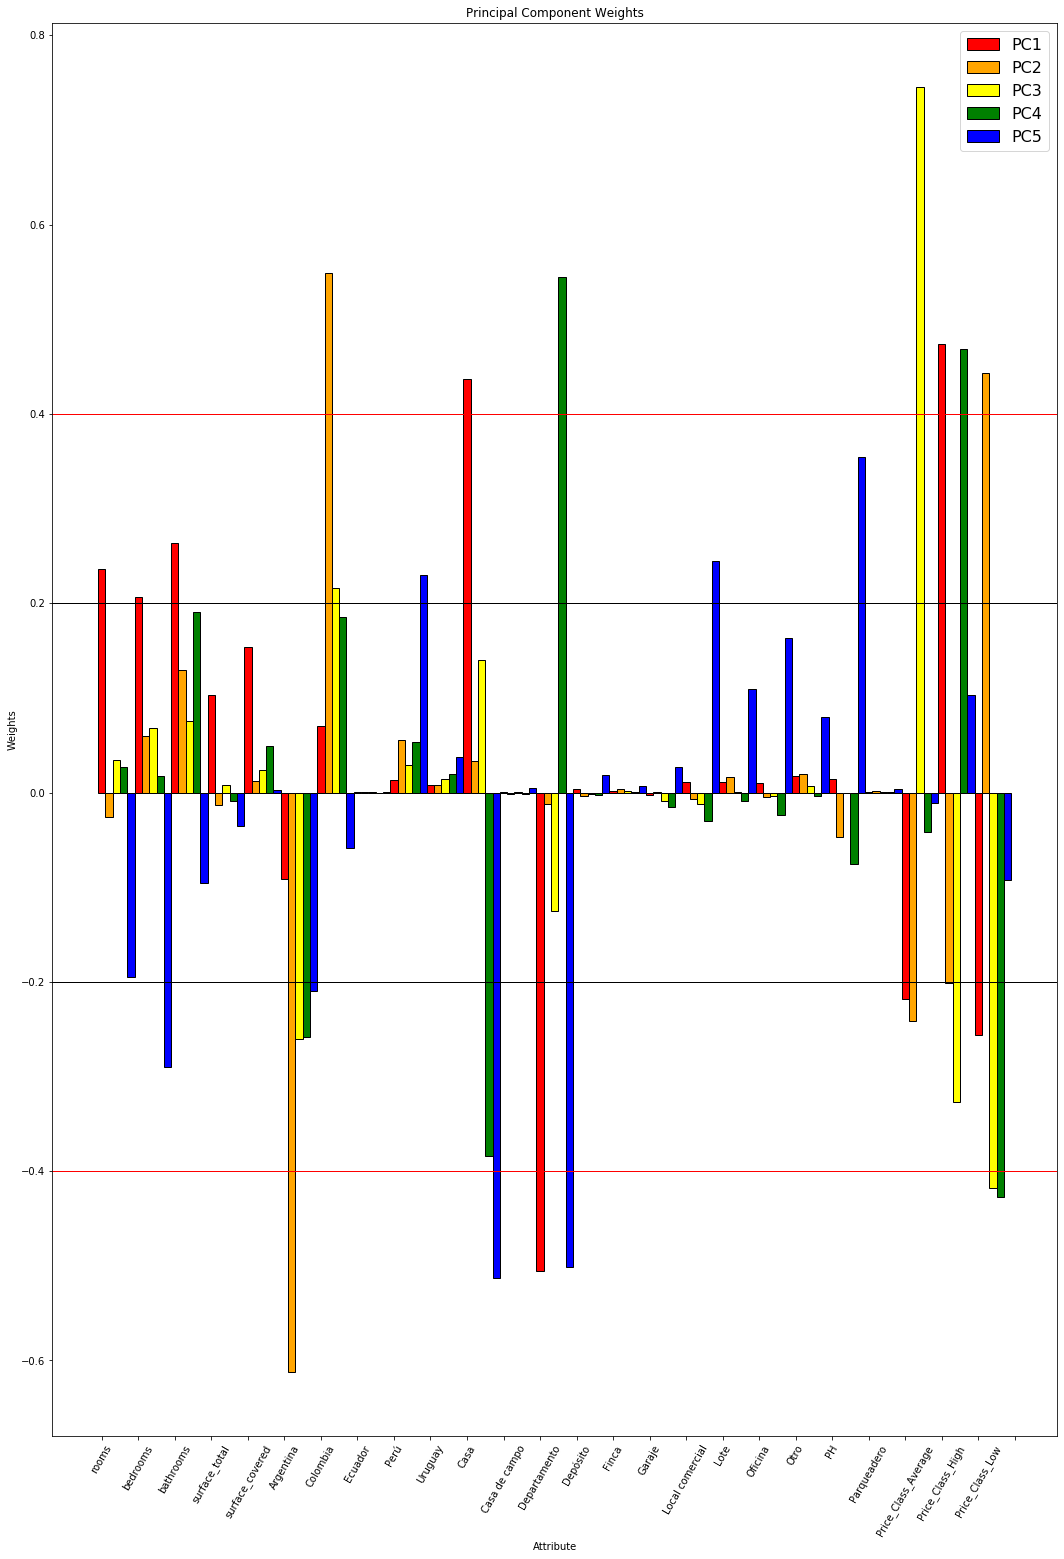

In [26]:
# Visualize PCA weights while weighting each PCA weight by the explained variance of the principal component.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Initialize figure properties
plt.figure(figsize = (18,26))
barwidth = .2

# Create the bar plot data
pc1 = Principal_Components[Principal_Components.PC == 'PC1'][:1:].drop(columns = ['PC']).transpose()[0]
pc2 = Principal_Components[Principal_Components.PC == 'PC2'][:1:].drop(columns = ['PC']).transpose()[1]
pc3 = Principal_Components[Principal_Components.PC == 'PC3'][:1:].drop(columns = ['PC']).transpose()[2]
pc4 = Principal_Components[Principal_Components.PC == 'PC4'][:1:].drop(columns = ['PC']).transpose()[3]
pc5 = Principal_Components[Principal_Components.PC == 'PC5'][:1:].drop(columns = ['PC']).transpose()[4]

# Create bar locations
p1 = np.arange(len(pc1))
p2 = [x + barwidth for x in p1]
p3 = [x + 2*barwidth for x in p1]
p4 = [x + 3*barwidth for x in p1]
p5 = [x + 4*barwidth for x in p1]

# Plot Principal Components
plt.bar(p1, pc1, color = 'red', width = barwidth, edgecolor = 'black', label = 'PC1')
plt.bar(p2, pc2, color = 'orange', width = barwidth, edgecolor = 'black', label = 'PC2')
plt.bar(p3, pc3, color = 'yellow', width = barwidth, edgecolor = 'black', label = 'PC3')
plt.bar(p4, pc4, color = 'green', width = barwidth, edgecolor = 'black', label = 'PC4')
plt.bar(p5, pc5, color = 'blue', width = barwidth, edgecolor = 'black', label = 'PC5')

# Plot significance threshold lines
plt.axhline(y=.4, linewidth = 1, color = 'red')
plt.axhline(y=-.4, linewidth = 1, color = 'red')
plt.axhline(y=.2, linewidth = 1, color = 'black')
plt.axhline(y=-.2, linewidth = 1, color = 'black')

# Edit chart properties
plt.xlabel('Attribute')
plt.xticks(range(0,26), Principal_Components.drop(columns = 'PC').columns.tolist(), rotation = 60)
plt.ylabel('Weights')
plt.title('Principal Component Weights')

# Increase text size
plt.rcParams.update({'font.size':16})

plt.legend()
plt.show()

The bar plot above shows the raw weights for each attribute by principal component. Weights with a magnitude of 0.4 or greater could be considered impactful for our data (red horizontal line), and weights with a magnitude greater than 0.2 may also be somewhat impactful. It is interesting to note that our first principal component, with the most explained variance has weights much smaller in magnitude compared to the other components. While this plot describes the makeup of each principal component, it does not indicate the relative importance of each feature in the context of how much variance each component explains. To account for this, we will plot the PC weights while weighting each components' weights by the components' explained variance and normalizing with the sum of all weights. This will yield the proportion of variance that each attribute within a principal component explains, since each feature was scaled between 0 and 1.

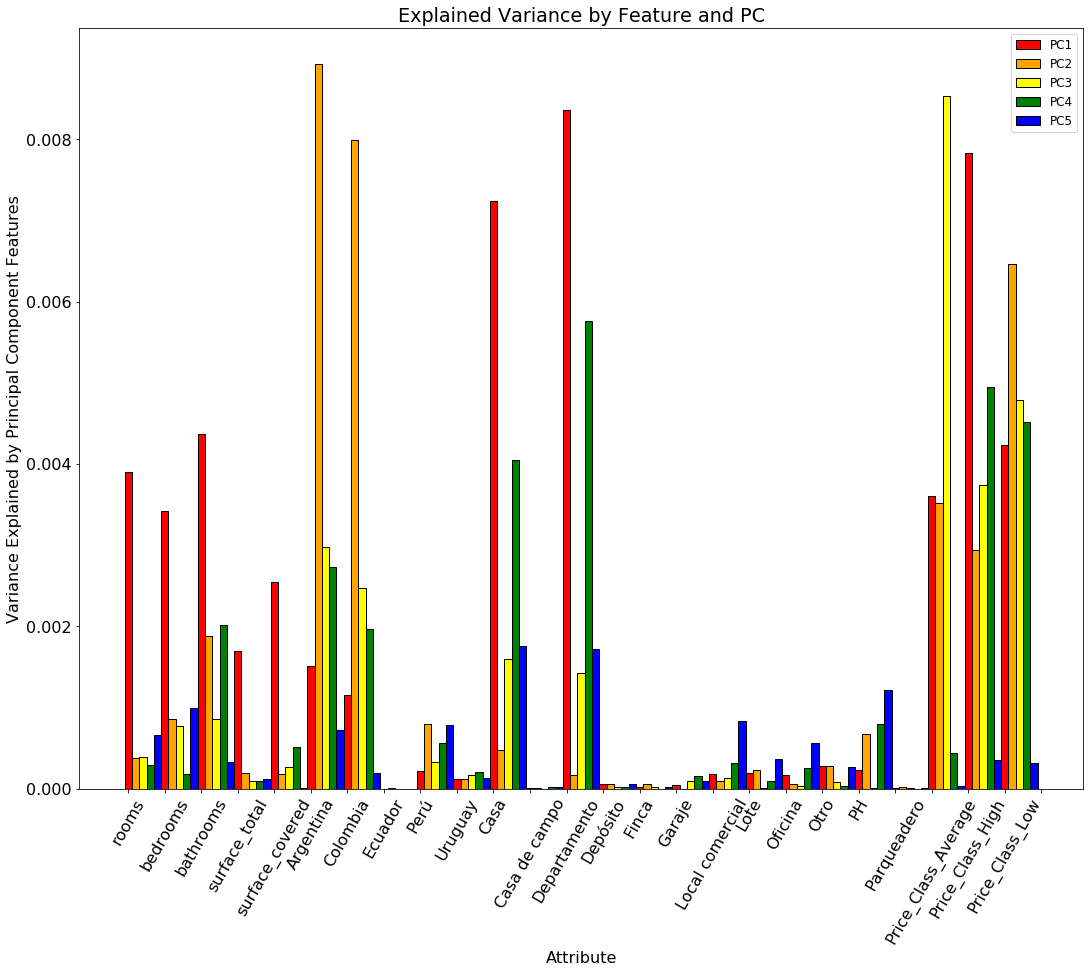

In [27]:
# Visualize PCA weights while weighting each PCA weight by the explained variance of the principal component and normalizing by the sum of weights ot get explained variance 
# per feature per principal component.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Sum the weights for normalization
sum_weights = sum(abs(pc1)) + sum(abs(pc2)) + sum(abs(pc3)) + sum(abs(pc4)) + sum(abs(pc5))

# Initialize figure properties
plt.figure(figsize = (18,14))
barwidth = .2

# Create the bar plot data, 
pc1 = abs(Principal_Components[Principal_Components.PC == 'PC1'][:1:].drop(columns = ['PC']).transpose()[0]*pca2.explained_variance_ratio_[0]/sum_weights)
pc2 = abs(Principal_Components[Principal_Components.PC == 'PC2'][:1:].drop(columns = ['PC']).transpose()[1]*pca2.explained_variance_ratio_[1]/sum_weights)
pc3 = abs(Principal_Components[Principal_Components.PC == 'PC3'][:1:].drop(columns = ['PC']).transpose()[2]*pca2.explained_variance_ratio_[2]/sum_weights)
pc4 = abs(Principal_Components[Principal_Components.PC == 'PC4'][:1:].drop(columns = ['PC']).transpose()[3]*pca2.explained_variance_ratio_[3]/sum_weights)
pc5 = abs(Principal_Components[Principal_Components.PC == 'PC5'][:1:].drop(columns = ['PC']).transpose()[4]*pca2.explained_variance_ratio_[4]/sum_weights)

# Create bar locations
p1 = np.arange(len(pc1))
p2 = [x + barwidth for x in p1]
p3 = [x + 2*barwidth for x in p1]
p4 = [x + 3*barwidth for x in p1]
p5 = [x + 4*barwidth for x in p1]

# Plot Principal Components
plt.bar(p1, pc1, color = 'red', width = barwidth, edgecolor = 'black', label = 'PC1')
plt.bar(p2, pc2, color = 'orange', width = barwidth, edgecolor = 'black', label = 'PC2')
plt.bar(p3, pc3, color = 'yellow', width = barwidth, edgecolor = 'black', label = 'PC3')
plt.bar(p4, pc4, color = 'green', width = barwidth, edgecolor = 'black', label = 'PC4')
plt.bar(p5, pc5, color = 'blue', width = barwidth, edgecolor = 'black', label = 'PC5')

# Plot significance threshold lines
#plt.axhline(y=.03, linewidth = 1, color = 'red')
#plt.axhline(y=.001, linewidth = 1, color = 'black')

# Edit chart properties
plt.xlabel('Attribute')
plt.xticks(range(0,26), Principal_Components.drop(columns = 'PC').columns.tolist(), rotation = 60)
plt.ylabel('Variance Explained by Principal Component Features')
plt.title('Explained Variance by Feature and PC')

# Increase text size
plt.rcParams.update({'font.size':12})

plt.legend()
plt.show()

The above bar plot charts the weight each component gives to each attribute, while weighting each component by its explained variance in order to compare the relative importance of each component and their weights.  It should be noted that each principal component up to and including PC4 all have weights 

In [28]:
# The output below are the raw weights for the principal components
Principal_Components

,PC,rooms,bedrooms,bathrooms,surface_total,surface_covered,Argentina,Colombia,Ecuador,Perú,Uruguay,Casa,Casa de campo,Departamento,Depósito,Finca,Garaje,Local comercial,Lote,Oficina,Otro,PH,Parqueadero,Price_Class_Average,Price_Class_High,Price_Class_Low
0,PC1,0.236155,0.206548,0.263928,0.102669,0.153587,-0.091269,0.070120,0.000252,0.013255,0.007642,0.437418,0.000544,-0.505036,0.003869,0.001584,-0.003036,0.011317,0.011673,0.009996,0.017097,0.013996,0.000579,-0.217638,0.473494,-0.255855
1,PC2,-0.025726,0.059448,0.129036,-0.013070,0.012236,-0.612432,0.548638,0.000381,0.055049,0.008365,0.033185,-0.001182,-0.011974,-0.003751,0.004076,0.000209,-0.006672,0.016224,-0.004267,0.019158,-0.046726,0.001719,-0.241664,-0.201579,0.443243
2,PC3,0.034515,0.067878,0.075301,0.008124,0.023627,-0.260449,0.216265,0.000431,0.028934,0.014819,0.139727,0.000078,-0.124954,-0.001582,0.002050,-0.008897,-0.011570,0.001053,-0.003130,0.007010,-0.000570,0.000785,0.745078,-0.327178,-0.417900
3,PC4,0.027349,0.017491,0.191029,-0.009210,0.049070,-0.258742,0.185870,-0.000177,0.053404,0.019646,-0.383572,-0.001986,0.544936,-0.002793,0.000327,-0.015116,-0.029729,-0.009061,-0.024075,-0.003249,-0.075847,0.000164,-0.041632,0.468587,-0.426955
4,PC5,-0.195152,-0.289946,-0.095469,-0.035194,0.002516,-0.210163,-0.058299,0.000348,0.230074,0.038039,-0.512425,0.005086,-0.501423,0.018530,0.006592,0.027278,0.245076,0.109061,0.163494,0.079884,0.354998,0.003849,-0.011011,0.103204,-0.092193


In [23]:
# Get the sum of all weights for each principal component to normalize each weight
sum_weights = Principal_Components.drop(columns = 'PC').abs()
sum_weights = sum_weights.sum(axis = 1)
sum_weights = np.array(sum_weights)
print(sum_weights) 

[3.10855492 2.50000977 2.52190623 2.8400142  3.38930397]


In [24]:
# Normalize the weights by dividing by the sum of weights per PC to determine variance explained per attribute
weights = Principal_Components.drop(columns = 'PC',  inplace = False).abs() # This works. Gets absolute value of weights
normalized_weights = np.transpose(np.transpose(weights) / sum_weights)
feature_importance = np.dot(np.transpose(normalized_weights), exp_var)
cols = Principal_Components.drop(columns = 'PC').columns

df_feat = pd.DataFrame(np.transpose(feature_importance), columns = cols)
print(df_feat.sum(axis=1))
df_feat # All variables listed using 5 PCs explain 0.812357 of all variance in the data.

0    0.812357
dtype: float64


,rooms,bedrooms,bathrooms,surface_total,surface_covered,Argentina,Colombia,Ecuador,Perú,Uruguay,Casa,Casa de campo,Departamento,Depósito,Finca,Garaje,Local comercial,Lote,Oficina,Otro,PH,Parqueadero,Price_Class_Average,Price_Class_High,Price_Class_Low
0,0.026755,0.030339,0.047485,0.010476,0.016965,0.092102,0.076162,0.000094,0.013706,0.003853,0.073278,0.000326,0.084176,0.001131,0.000709,0.002034,0.007329,0.004389,0.004989,0.004702,0.014233,0.000304,0.087812,0.100945,0.108063


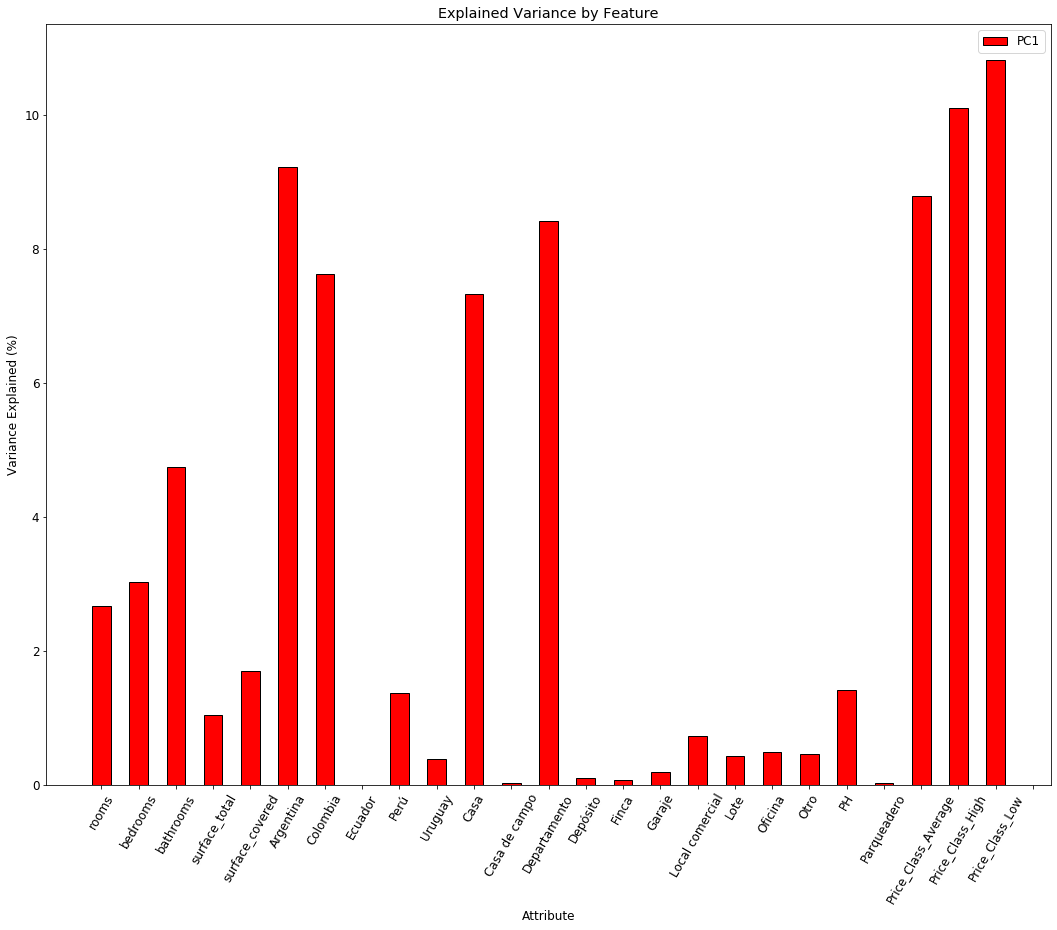

In [36]:
# Plot the total explained variance of each feature
# Initialize figure properties
plt.figure(figsize = (18,14))
barwidth = .5

#plt.bar(df_feat.columns, height = df_feat.values)

# # Create the bar plot data, 
bar = np.array(df_feat)

# Create bar locations
p1 = np.arange(len(df_feat.columns))

# # Plot Principal Components
plt.bar(p1, bar[0]*100, color = 'red', width = barwidth, edgecolor = 'black', label = 'PC1')

# # Plot significance threshold lines
# #plt.axhline(y=.03, linewidth = 1, color = 'red')
# #plt.axhline(y=.001, linewidth = 1, color = 'black')

# Edit chart properties
plt.xlabel('Attribute')
plt.xticks(range(0,26), Principal_Components.drop(columns = 'PC').columns.tolist(), rotation = 60)
plt.ylabel('Variance Explained (%)')
plt.title('Explained Variance by Feature')

# Increase text size
plt.rcParams.update({'font.size':12})

plt.legend()
plt.show()

# Clustering on PCA data
In this section we will explore multiple clustering algorithms to determine the most effective method.  Each clustering algorithm will be compared using the silhouette score.  The algorithms will be trained with a balanced subset of our dataset to improve computation time and to better represent each feature.

In [26]:
# We may need to balance the data when subsampling by using random undersampling of apartment and house property types
print(df_priceclass['property_type'].value_counts())
print(df_priceclass.count())

Departamento       231716
Casa                85319
PH                  18119
Local comercial     11554
Oficina              9580
Otro                 6576
Lote                 6231
Garaje               2151
Depósito             1688
Finca                 637
Casa de campo         578
Parqueadero           284
Name: property_type, dtype: int64
rooms                  374433
bedrooms               374433
bathrooms              374433
surface_total          374433
surface_covered        374433
log_price              374433
property_type          374433
l1                     374433
price_class            374433
price_class_overall    374433
dtype: int64


In [85]:
# Pick subsamples of property type departamento and casa that are roughly equal to the sample size of other property types
np.random.seed(6)
casa_ind = df_priceclass[df_priceclass.property_type == 'Casa'].index
casa_samp = np.random.choice(casa_ind, 20000, replace = False)

apt_ind = df_priceclass[df_priceclass.property_type == 'Departamento'].index
apt_samp = np.random.choice(apt_ind, 20000, replace = False)

other_ind = df_priceclass[(df_priceclass.property_type != 'Casa') & (df_priceclass.property_type != 'Departamento')].index

sample = np.concatenate((casa_samp, apt_samp, other_ind), axis =0)
X = PCA_comps.loc[sample]
y = df_priceclass.property_type.loc[sample]

In [48]:
# Begin with k-means ++ clustering using PCA_comps dataframe and grid search
from sklearn.cluster import KMeans
kmeans = KMeans(init = 'k-means++', verbose = 1, random_state = 6, n_jobs = 16)

Run an initial loop testing a wide range of cluster numbers to determine which range we should focus on. 
# NOTE: This clusters on all 5 Principal Components. Reduce to 3?

In [ ]:
# Manual loop to cluster and calculate silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

print(__doc__)

n_clusters = [5, 8, 10, 15, 20]

for n_cluster in n_clusters:
    # Create subplot
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(16,10)
    
    # 1st subplot is silhouette plot which range from -1 to 1
    ax1.set_xlim([-.25,.25]) # was [-1, 1]
    ax1.set_ylim([0, len(X) + (n_cluster + 1) * 10])
    
    kmeans = KMeans(n_clusters = n_cluster, random_state = 6)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("for n_clusters = ", n_cluster, ": The average silhouette score is:", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in n_clusters:
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_cluster)
#         ax1.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = kmeans.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

# plt.show()

The clustering above suggests higher cluster counts, since the silhouette score increases as do the number of clusters. We will run again and visualize the outputs

In [ ]:
n_clusters = [20, 24, 28, 32, 36]

for n_cluster in n_clusters:
    
    kmeans = KMeans(n_clusters = n_cluster, random_state = 6)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("for n_clusters = ", n_cluster, ": The average silhouette score is:", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

The silhouette score begins dropping between 20-24 clusters. We will run the algorithm one more time to find the optimum number of clusters

In [96]:
n_clusters = [18, 19, 20, 21, 22]

for n_cluster in n_clusters:
    
    kmeans = KMeans(n_clusters = n_cluster, random_state = 6)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("for n_clusters = ", n_cluster, ": The average silhouette score is:", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

for n_clusters =  18 : The average silhouette score is: 0.7091954672234012
for n_clusters =  19 : The average silhouette score is: 0.7129873749888378
for n_clusters =  20 : The average silhouette score is: 0.7132115536016574
for n_clusters =  21 : The average silhouette score is: 0.6780667802934455
for n_clusters =  22 : The average silhouette score is: 0.6425705392740897


The optimum number of clusters was found to be 20, with a silhouette score of 0.71321155. We will now visualize these clusters in the 3D principal component space.

In [97]:
# Cluster the data using 20 clusters
kmeans = KMeans(n_clusters = 20, random_state = 6, n_jobs = 16)
cluster_labels = kmeans.fit_predict(X)

# cluster_labels.cluster_centers_ gives ndarray of shape(n_clusters, n_features)
# cluster_labels.labels_ ndarray of shape (n_samples,) is label for each point. Attach to data and plot

C:\Users\Tpeng\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [100]:
# Create a dataframe of original data with clusters added for visualization
# Not sure how well this visualization will work
df_viz = df_priceclass.loc[sample]
df_viz['Cluster'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [ ]:
df_viz

In [108]:
# Create a dataframe with principal component data with l1, property type, price class overall and cluster added
pca_sample = PCA_comps.loc[sample]
pca_sample.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', ]
pca_sample['Cluster'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [ ]:
# Visualize observations on principal component axes.
# This has numerics except prices, and l1 prop type in PCs
fig = px.scatter_3d(pca_sample, x = 'PC1', y = 'PC2', z = 'PC3', color = 'Cluster')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()

<font color = 'red'> Interpret the plot above. Add cluster centers

In [ ]:
# Visualize observations on principal component axes.
# This has numerics except prices, and l1 prop type in PCs
fig = px.scatter_3d(PCA_comps, x = 'PC1', y = 'PC2', z = 'PC3', color = 'property_type')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()

## DBSCAN Clustering

In [ ]:
# This did not work because grid search requires CV, which I don't want for clustering
from sklearn.cluster import DBSCAN
db_cls = DBSCAN()
params = dict(db_cls__eps = [0.5, 0.9],
              db_cls__min_samples = [55],
              db_cls__metric = [silhouette_score(X, cluster_labels)],
              db_cls__algorithm = ['ball_tree'],
              db_cls__leaf_size = [50])

db_gs = GridSearchCV(db_cls, param_grid = params, scoring = silhouette_score(X, cluster_labels), n_jobs = 16, cv = 1)
%time db_gs.fit(X)

In [ ]:
# Grid Search CV requires cross validation. Try custom loops to run without cross validation
from sklearn.cluster import DBSCAN
db_cls = DBSCAN()
params = dict(db_cls__eps = [0.5, 0.9],
              db_cls__min_samples = [55],
              db_cls__metric = [silhouette_score(X, cluster_labels)],
              db_cls__algorithm = ['ball_tree'],
              db_cls__leaf_size = [50])

db_gs = GridSearchCV(db_cls, param_grid = params, scoring = silhouette_score(X, cluster_labels), n_jobs = 16, cv = 1)
db_gs.fit(X)


# Create variable ranges
eps = [0.5, 0.9]
min_samples = [55]
# metric = [silhouette_score(X, cluster_labels)]
algorithm = ['ball_tree']
leaf_size = [50]

# Begin loop
for ep in eps:
    for min_samp in min_samples:
        for algo in algorithm:
            for leaf in leaf_size:
                db_cls = DBSCAN(eps = ep, min_samples = min_samp, algorithm = algo, leaf_size = leaf, n_jobs = 16)
                db_cls.fit_predict(X)
                db_labels = db_cls.labels_ # Do last? Get cluster silhouette scores first

In [ ]:
# This is the 'full' DBSCAN to be run once the above works
from sklearn.cluster import DBSCAN
db_cls = DBSCAN()
params = dict(db_cls__eps = [0.3, 0.5, 0.7, 0.9],
              db_cls__min_samples = [7, 15, 23, 31, 39, 47, 55],
              db_cls__metric = silhouette_score(X, cluster_labels),
              db_cls__algorithm = ['ball_tree'],
              db_cls__leaf_size = [30, 50, 70, 90])

db_gs = GridSearchCV(db_cls, param_grid = params, scoring = silhouette_score(X, cluster_labels), n_jobs = 16, cv = 1)

# <font color = 'blue'>III. MODELING AND EVALUATION: CLUSTER ANALYSIS - Train and Adjust Parameters




# <font color = 'blue'>III. MODELING AND EVALUATION: CLUSTER ANALYSIS - Evaluate and Compare



# <font color = 'blue'>III. MODELING AND EVALUATION: CLUSTER ANALYSIS - Visualize Results



# <font color = 'blue'>III. MODELING AND EVALUATION: Summarize the Rammications from Cluster Analysis

# <font color = 'blue'>IV. Deployment
<font color = 'blue'>Our model can be used by potential investors wanting to do due diligence on properties for sale in South America.  In order to stay relevant, the model will need to be updated on a quarterly basis to reflect market fluctuations.  In addition, there is a high degree of data wrangling and preprocessing needed in terms of combining data sets from different countries and quality checks for missing or invalid data values.  Given this detailed maintenance and since regular updates are needed, a user subscription based deployment would be ideal to keep our model accurate and end-user friendly.

# <font color = 'blue'>V.  Exceptional Work


